
# 26. Superstore Dataset 


<div>
<img src="https://github.com/Razelbaz1/my-project/blob/main/Big-data-analytics-solutions.jpg?raw=true"  height = "20"/>
</div>


# <b> </b> <b style='color:#F05454'>Contents</b>
#  <b id="Top"> </b>  

[**1.Introduction & Basic EDA.**](#introductions)

[**2.Discounts & Sales**](#Discounts&Sales)

[**3.Pareto principle.**](#Pareto-principle)

[**4.Prediction model.**](#Prediction-model)




___
#  <b id="introductions"> </b> <b style='color:black'>Introduction </b> <b> &  Basic <b style='color:#F05454'>EDA. </b>  

## <b>Importing </b> <b style='color:#F05454'>Libraries.</b>



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

# sklearn
import sklearn as sk # SciKit learn package
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

plt.style.use('fivethirtyeight')

## <b id='Read-data'>Read </b> <b style='color:#F05454'>Data.</b>

In [2]:
url = 'https://raw.githubusercontent.com/Razelbaz1/my-project/main/Sample%20-%20Superstore.csv'
super_df = pd.read_csv(url,encoding='latin1')

In [3]:
super_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

___
# <b id = 'Discounts&Sales' > </b> <b style='color:#F05454'>Discounts </b> <b>  lead to sales </b> <b style='color:#F05454'> growth ? </b> <b></b>     

נציג מפת חום שבודקת את הקורלציה בין מכירות ,הנחות ורווחים

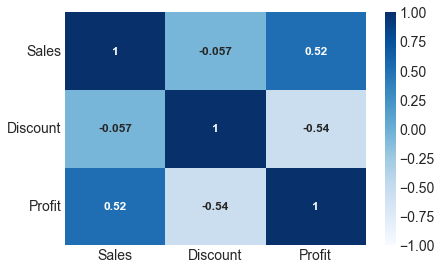

In [57]:
corr = super_df[['Sales','Discount','Profit']].corr(method='spearman')
sns.heatmap(corr, annot = True, cmap='Blues',vmin = -1,vmax = 1,
           annot_kws = {
                   'fontsize' : 12,
                   'fontweight' : 'bold'
                       })
plt.yticks(rotation = 0);

In [62]:
profit_by_state = super_df.groupby("State")[['Sales' , "Profit"]].sum().reset_index()
neg_profit = profit_by_state[profit_by_state['Profit'] < 0] 
neg_profit.sort_values(by = "Profit")

,State,Sales,Profit
41,Texas,170188.0458,-25729.3563
33,Ohio,78258.1360,-16971.3766
36,Pennsylvania,116511.9140,-15559.9603
11,Illinois,80166.1010,-12607.8870
31,North Carolina,55603.1640,-7490.9122
4,Colorado,32108.1180,-6527.8579
40,Tennessee,30661.8730,-5341.6936
1,Arizona,35282.0010,-3427.9246
8,Florida,89473.7080,-3399.3017
35,Oregon,17431.1500,-1190.4705


In [63]:
neg_profit = super_df.groupby("State")[['Sales' ,"Discount" , "Profit"]].mean().reset_index()
with_discount = neg_profit[neg_profit['Discount'] > 0]
without_discount = neg_profit[neg_profit['Discount'] == 0]

In [64]:
with_discount= with_discount.round({'Sales':0})


In [65]:
without_discount= without_discount.round({'Sales':0})

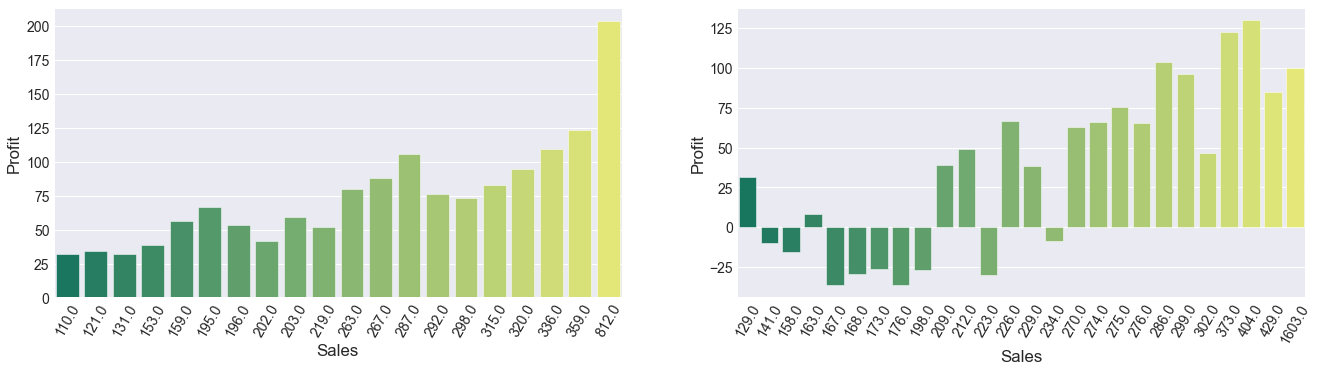

In [105]:
fig, axes = plt.subplots(figsize=(20, 5), ncols=2)
sns.barplot(ax = axes[0] , x = "Sales" ,
            ci = None, y = "Profit" , data = without_discount,  palette = 'summer')

sns.barplot(ax = axes[1] ,ci= None,  x = "Sales" , y = "Profit" , data = with_discount, palette = 'summer' )

axes[0].tick_params(axis='x', rotation=60)
axes[1].tick_params(axis='x', rotation=60)


הצגת ערכי הקטגוריות והפערים ברווחים 

In [58]:
category_d = pd.DataFrame(super_df.groupby('Category')[['Quantity','Sales','Profit']].sum()).round().copy()

In [59]:
def create_colors(x):
    #copy df to new - original data are not changed
    df1 = x.copy().round()
    #select all values to default value - no color
    df1.loc[:,:] = 'background-color: '
    #overwrite values with green and red color
    df1.loc['Technology', 'Profit'] = 'background-color: lime'
    df1.loc['Office Supplies', 'Profit'] = 'background-color: lime'
    df1.loc['Furniture', 'Profit'] = 'background-color: red'
    #df1.loc['Maine', 'armored'] = 'background-color: red'
    #return color df
    return df1.round()      

category_d.style.apply(create_colors, axis=None)

,Quantity,Sales,Profit
Category,,,
Furniture,8028,742000.000000,18451.000000
Office Supplies,22906,719047.000000,122491.000000
Technology,6939,836154.000000,145455.000000


קטגוריית הטכנולוגיה מוכר 1000 יחידות פחות מהריהוט ועדיין מרוויח כמעט פי 8 יותר ממנו.
קטגוריית ציוד משרדי מוכר פי 3 יותר מהטכנולוגיה ומרוויח 30 אלף פחות 

סיווג לעם הנחה ובלי הנחה לקטגוריות  

In [7]:
with_d= super_df.loc[(super_df["Discount"] > 0)]

הגדרת משתנה לרהיטים

In [8]:
furniture= super_df.loc[(super_df["Category"] == 'Furniture')]

סיווג לעם הנחה ובלי הנחה לרהיטים 

In [9]:
with_d_F= furniture.loc[(furniture["Discount"] > 0)]

יצירת גרפים 

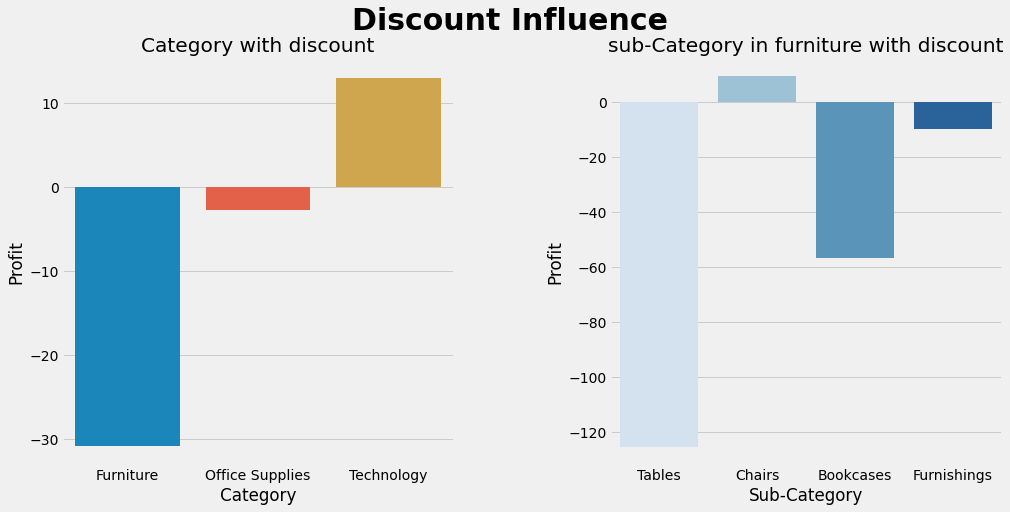

In [10]:
fig, axes = plt.subplots(1 ,2 ,figsize = (15,7) ,sharex = False, sharey = False)

fig.suptitle('Discount Influence ',fontsize = 30,fontweight = 'bold')

plt.subplots_adjust(wspace = 0.4)


sns.barplot( x = "Category" , y = "Profit" , data = with_d, ci=False, ax=axes[0]);
axes[0].set_title('Category with discount')

sns.barplot( x = "Sub-Category" , y = "Profit" , data =with_d_F, ci=False,ax=axes[1], palette = 'Blues');
axes[1].set_title('sub-Category in furniture with discount') ;

plt.show()

התקדמות למוצר בודד - שולחן

In [11]:
tables= super_df.loc[(super_df["Sub-Category"] =='Tables')]
tables.groupby("State")[[ "Sales" , "Profit"]].mean().reset_index().sort_values(by= 'Profit');

סיווג לשולחנות ברווח ובהפסד

In [12]:
tables_positive = tables.loc[(tables["Profit"] > 0)]
tables_negative = tables.loc[(tables["Profit"]< 0)]

In [14]:
tp = tables_positive .groupby("State")[["Profit"]].sum().reset_index()

In [15]:
tn = tables_negative.groupby("State")[["Profit"]].sum().reset_index()

איחוד השולחנות

In [16]:
df_new3 = pd.concat([tn, tp]).reset_index()

סיווג לקבוצות

In [17]:
temp = pd.DataFrame(columns=['n/p'], index=range(41))
temp.at[0, 'n/p'] = "n"
temp.at[20, 'n/p'] = "p"
temp2 = temp[['n/p']].fillna(method='ffill')

In [19]:
dfnew4 = df_new3.join(temp2)
dfnew5 = dfnew4['Profit'].abs()
dfnew5
dfnew4['Profit(Abs)'] = dfnew5

In [20]:
to_pie = dfnew4.groupby(['n/p']).sum().round().reset_index()

הצגת איור 

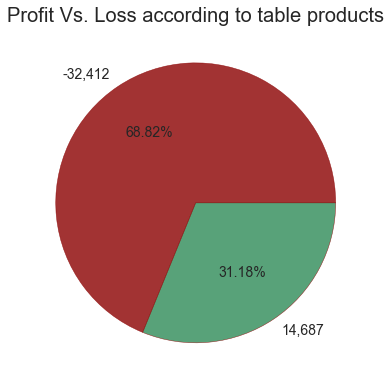

In [61]:
colors= ['darkred','seagreen']
plt.figure(figsize=(14, 6))
arg = ['-32,412','14,687']

plt.pie(to_pie['Profit(Abs)'], labels = arg, colors = colors, 
        wedgeprops = dict(alpha = 0.8, edgecolor = 'darkred'), autopct = '%.2f%%');
plt.title('Profit Vs. Loss according to table products');

נשים לב שהרווחים לא אחידים במתן ההנחה
ניתן לראות שהשולחנות לוקחים חלק גדול בהפסדים 

על ידי הפילוחים השונים הצגנו את המסקנה כי ההנחות מייצרות רווחים לא יציבים ואף רווחים שליליים!


### [▲](#Top)

___
#  <b id="Pareto-principle"> </b> <b style='color:#F05454'>Pareto principle </b> <b>to customers and Sales.</b> 

In [60]:
df1=pd.DataFrame(super_df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False))
df1

,Sales
Customer Name,
Sean Miller,25043.050
Tamara Chand,19052.218
Raymond Buch,15117.339
Tom Ashbrook,14595.620
Adrian Barton,14473.571
...,...
Roy Skaria,22.328
Mitch Gastineau,16.739
Carl Jackson,16.520


In [23]:
df1["cumpercentage"]  = df1["Sales"].cumsum()/df1['Sales'].sum()*100
df1.head(74)

,Sales,cumpercentage
Customer Name,,
Sean Miller,25043.0500,1.090155
Tamara Chand,19052.2180,1.919522
Raymond Buch,15117.3390,2.577598
Tom Ashbrook,14595.6200,3.212964
Adrian Barton,14473.5710,3.843016
...,...,...
Corinna Mitchell,6339.5576,28.198454
Max Jones,6320.7460,28.473604
Brosina Hoffman,6255.3510,28.745907


### Group classification.

In [24]:
df2 = df1.copy().reset_index()

In [25]:
temp = pd.DataFrame(columns=['A/B'], index=range(793))
temp.at[0, 'A/B'] = "A"
temp.at[76, 'A/B'] = "B"

In [26]:
temp2 = temp[['A/B']].fillna(method='ffill')

In [27]:
dfnew = df2.join(temp2)
dfnew

,Customer Name,Sales,cumpercentage,A/B
0,Sean Miller,25043.050,1.090155,A
1,Tamara Chand,19052.218,1.919522,A
2,Raymond Buch,15117.339,2.577598,A
3,Tom Ashbrook,14595.620,3.212964,A
4,Adrian Barton,14473.571,3.843016,A
...,...,...,...,...
788,Roy Skaria,22.328,99.998111,B
789,Mitch Gastineau,16.739,99.998840,B
790,Carl Jackson,16.520,99.999559,B
791,Lela Donovan,5.304,99.999790,B


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


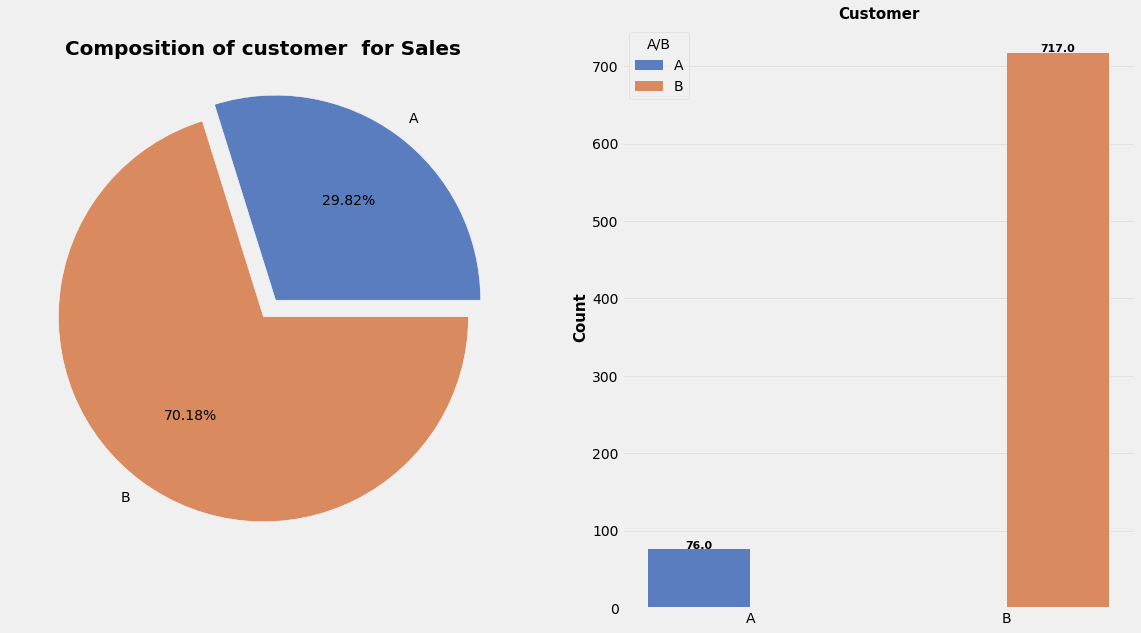

In [28]:
# --- Colors and Labels (Null Values Dropped) ---
colors= ['#597dbf','#d98b5f']
df_pie = dfnew[['A/B','Sales']]
df_pie = df_pie.groupby(['A/B']).sum().reset_index()

# --- Size for Both Figures ---
plt.figure(figsize=(18, 10))

# --- Pie Chart ---
plt.subplot(1, 2, 1)
explode = (0.1, 0)
plt.title('Composition of customer  for Sales', fontweight = 'bold', fontsize = 20, fontfamily = 'sans-serif', 
          color = 'black')
plt.pie(df_pie['Sales'], labels = df_pie['A/B'], colors = colors, 
        wedgeprops = dict(alpha = 1, edgecolor = 'white'), autopct = '%.2f%%',explode = explode)
##############
# Taking a subset of data (To keep things simple)
df_stackb = dfnew[['A/B','Sales']]
# taking a groupby on category and then ship mode...
df_stackb = df_stackb.groupby(['A/B']).sum().reset_index()
######

plt.subplot(1, 2, 2)
ax = sns.countplot(data = dfnew ,x = 'A/B' , hue = 'A/B' , palette = 'muted')
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+0.75,rect.get_height(), horizontalalignment = 'center', 
             fontsize = 11, fontweight = 'bold')
plt.title('Customer', fontweight = 'bold', fontsize = 15, fontfamily = 'sans-serif', color = 'black')
plt.xlabel('', fontweight = 'bold', fontsize = 15, fontfamily = 'sans-serif', color = 'black')
plt.ylabel('Count', fontweight = 'bold', fontsize = 15, fontfamily = 'sans-serif', color = 'black')
plt.grid(axis = 'y', alpha = 0.4)




## </b> <b style='color:#F05454'>1% </b> <b> of customer occupy </b> <b style='color:#F05454'> 30% of sales! </b>

### [▲](#Top)

___
#  <b id="Prediction-model"> </b> <b style='color:#F05454'>Prediction </b> <b> model.</b> 


## <b id="Preparation of data for prediction."> Preparation of data for </b> <b style='color:#F05454'>prediction.</b>

In [29]:
model_df = super_df.copy()
model_df.drop(columns='Country', inplace=True) #All records are from the United States, therefore it would not provide
#importance for a model
model_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [30]:
# FOR EXAMPLE
model_df['Product Name'].nunique() #Very high cardinality column, we can drop this column.

1850

In [31]:
model_df.drop(columns='Product Name', inplace=True)

In [32]:
#sub category can stay, it only has got 17 unique vals.

## <b id="Ect columns with extreme cardinality don't contribute to predictions.">Etc for columns with extreme cardinality that  </b> <b style='color:#F05454'>don't </b> <b>contribute to predictions.</b> 

In [33]:
model_df.drop(columns=['Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name', 'Postal Code', 'Product ID'], inplace=True)

In [34]:
model_df.drop(columns='Row ID', inplace=True)

In [35]:
model_df.head() 

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

cities = model_df['City']
label_encoder.fit(cities)
model_df['City'] = label_encoder.transform(model_df['City'])


states = model_df['State']
label_encoder.fit(states)
model_df['State'] = label_encoder.transform(model_df['State'])

## The data is ready.

In [37]:
# final Dataframe 
new_cols = ['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category', 'Quantity', 'Discount', 'Profit', 'Sales']
model_df_ra = model_df[new_cols].copy() # Clean model 



### Turning values into categories enocoded categories:

In [38]:
model_df_ra['Segment'] = model_df_ra['Segment'].astype('category').cat.codes
model_df_ra['Region'] =  model_df_ra['Region'].astype('category').cat.codes
model_df_ra['Category'] =  model_df_ra['Category'].astype('category').cat.codes
model_df_ra['Sub-Category'] =  model_df_ra['Sub-Category'].astype('category').cat.codes
model_df_ra['Ship Mode'] =  model_df_ra['Ship Mode'].astype('category').cat.codes

# </b> <b style='color:#F05454'>Define </b> <b> a target column. </b> 

### split to train and test data

In [39]:
features = ['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category', 'Quantity', 'Discount', 'Profit']
pred_label = ['Sales'] # 5-point scale used to characterize dementia level

# </b> <b style='color:#F05454'>Fit. </b>

In [40]:
sc = StandardScaler()  # Normalize the data
X = model_df_ra[features] 
y = model_df_ra[pred_label]
X = sc.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)  # Setup data for train&test

# </b> <b style='color:#F05454'>Predict. </b>

In [54]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 7) # Setting rank 
X_poly = poly.fit_transform(X) # transform X to PolynomialFeatures.
 
poly.fit(X_poly, y) # fit the algo
lin2 = LinearRegression()
lin2.fit(X_poly, y) # fit LinearRegression



LinearRegression()

# </b> <b style='color:#F05454'>Evaluate. </b>

In [55]:
from sklearn.metrics import mean_squared_error as mse
pred = lin2.predict(poly.fit_transform(X_test)) # Define pred var
print("MSE: {:.3f}".format(mse(pred,y_test,squared=False)))   # note for CDR cat units, since CDR is ordered there is logic in MSE
a = pd.DataFrame(pred).reset_index() # predict var
b = pd.DataFrame(y_test).reset_index() # 20% from the real data
a.drop(columns='index', inplace=True)
b.drop(columns='index', inplace=True)
a.rename(columns = {0: 'Pred'},inplace = True)
c = a.join(b) 
    


MSE: 8.546


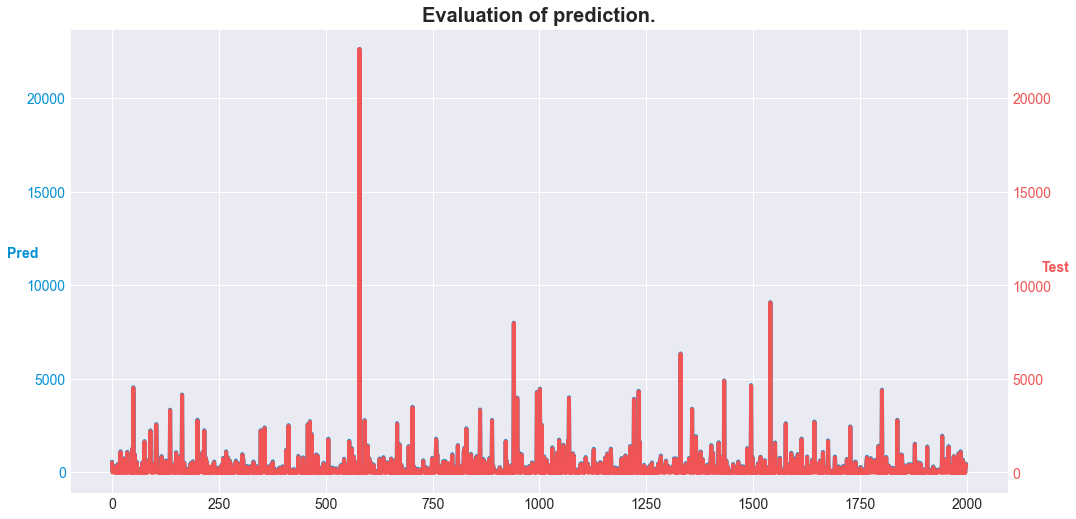

In [56]:
sns.set_style("darkgrid") # set theme


fig, ax1 = plt.subplots(figsize=(15,8)) 

ax1.set_title('Evaluation of prediction.', fontweight='bold', fontsize=20)
ax1.plot(a)
ax1.set_ylabel('Pred', rotation = 0)
ax1.set_ylabel('Pred', color='#0290d5', fontweight='bold', fontsize=14)
ax1.tick_params(axis='y', labelcolor='#0290d5', labelsize=14)


ax2 = ax1.twinx()

ax2.plot(b, color='#F05454')
ax2.set_ylabel('Test', rotation = 0);
ax2.set_ylabel('Test', color='#F05454', fontweight='bold', fontsize=14)
ax2.tick_params(axis='y', labelcolor='#F05454', labelsize=14)
ax2.grid(False)


In [ ]:
from IPython import display

<div>
<center> <img src="https://github.com/Razelbaz1/my-project/blob/main/p3ics/deg%204%2C%20mse%20180.png?raw=true" width = "500"/> 
<div>

### [▲](#Top)

<div>
<center><img src="https://github.com/Razelbaz1/my-project/blob/main/pics/RMBY2.jpeg?raw=true"  width = "500"/>
</div>